In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
d = { 't (hrs)' : [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
      'Pwf (psi)' : [3932.50, 3851.27, 3770.03, 3688.80, 3625.00, 3580.00, 3540.00, 3495.07, 3413.84, 3332.60]}
df = pd.DataFrame(data=d)
print(df.round(2))

   t (hrs)  Pwf (psi)
0     0.00    3932.50
1     0.00    3851.27
2     0.00    3770.03
3     0.00    3688.80
4     0.01    3625.00
5     0.10    3580.00
6     1.00    3540.00
7    10.00    3495.07
8   100.00    3413.84
9  1000.00    3332.60


In [4]:
pi = 4000 #psia
q = 90.5 #bbl/day
oil_visc = 1 #cp
cf =  1.00E-05 #1/psi
cm = 1.00E-05 #1/psi
rw = 0.375 #ft
phi_m = 0.05
km = 0.01 
bo = 1 #bbl/STB
h= 9.2 #ft

# Semilogarithmic crossplot; time in the logarithmic scale (x axis) and flow pressure in the Cartesian scale (hint: the first 3 data points give a straight line. The last 3 data points give a straight line. Theoretically the 2 straight lines should be parallel)

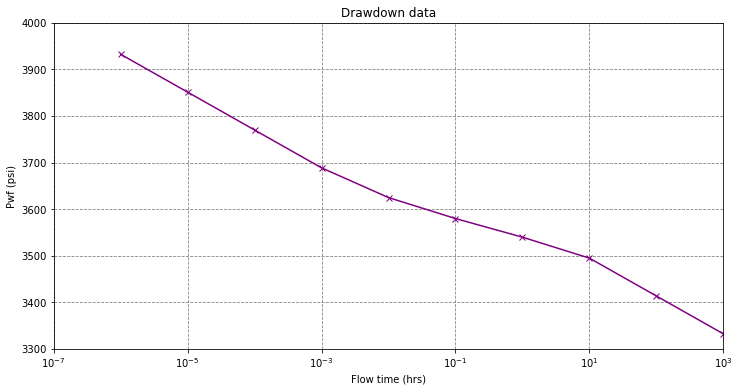

In [15]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['t (hrs)'], df['Pwf (psi)'], marker = 'x', color = 'purple')

ax.yaxis.grid(color ='grey', linestyle ='--')
ax.xaxis.grid(color ='grey', linestyle ='--')
ax.set_title('Drawdown data')
ax.set_xlabel('Flow time (hrs)')
ax.set_ylabel('Pwf (psi)')

ax.set_ylim([3300,4000])
ax.set_xlim([1.00E-07,1.00E+03])
ax.set_yscale('linear')
ax.set_xscale('log')

# Log-Log crossplot of (pi - pwf) vs flow time and the pressure derivative

In [7]:
df['Pi-Pwf']=pi-df['Pwf (psi)']
df

,t (hrs),Pwf (psi),Pi-Pwf
0,0.000001,3932.50,67.50
1,0.000010,3851.27,148.73
2,0.000100,3770.03,229.97
3,0.001000,3688.80,311.20
4,0.010000,3625.00,375.00
5,0.100000,3580.00,420.00
6,1.000000,3540.00,460.00
7,10.000000,3495.07,504.93
8,100.000000,3413.84,586.16
9,1000.000000,3332.60,667.40


In [8]:
df['Log(t)'] = np.log(df['t (hrs)'])
df


,t (hrs),Pwf (psi),Pi-Pwf,Log(t)
0,0.000001,3932.50,67.50,-13.815511
1,0.000010,3851.27,148.73,-11.512925
2,0.000100,3770.03,229.97,-9.210340
3,0.001000,3688.80,311.20,-6.907755
4,0.010000,3625.00,375.00,-4.605170
5,0.100000,3580.00,420.00,-2.302585
6,1.000000,3540.00,460.00,0.000000
7,10.000000,3495.07,504.93,2.302585
8,100.000000,3413.84,586.16,4.605170
9,1000.000000,3332.60,667.40,6.907755


In [9]:
df['Delta P'] = len(df['Log(t)'])
df['Delta P'][0] = np.nan
df['Delta P'][9] = np.nan

In [10]:
df['Delta P'][1] = (df['Pi-Pwf'][2]- df['Pi-Pwf'][0]) / (df['Log(t)'][2]- df['Log(t)'][0])
df['Delta P'][2] = (df['Pi-Pwf'][3]- df['Pi-Pwf'][1]) / (df['Log(t)'][3]- df['Log(t)'][1])
df['Delta P'][3] = (df['Pi-Pwf'][4]- df['Pi-Pwf'][2]) / (df['Log(t)'][4]- df['Log(t)'][2])
df['Delta P'][4] = (df['Pi-Pwf'][5]- df['Pi-Pwf'][3]) / (df['Log(t)'][5]- df['Log(t)'][3])
df['Delta P'][5] = (df['Pi-Pwf'][6]- df['Pi-Pwf'][4]) / (df['Log(t)'][6]- df['Log(t)'][4])
df['Delta P'][6] = (df['Pi-Pwf'][7]- df['Pi-Pwf'][5]) / (df['Log(t)'][7]- df['Log(t)'][5])
df['Delta P'][7] = (df['Pi-Pwf'][8]- df['Pi-Pwf'][6]) / (df['Log(t)'][8]- df['Log(t)'][6])
df['Delta P'][8] = (df['Pi-Pwf'][9]- df['Pi-Pwf'][7]) / (df['Log(t)'][9]- df['Log(t)'][7])
df


,t (hrs),Pwf (psi),Pi-Pwf,Log(t),Delta P
0,0.000001,3932.50,67.50,-13.815511,NaN
1,0.000010,3851.27,148.73,-11.512925,35.279912
2,0.000100,3770.03,229.97,-9.210340,35.279912
3,0.001000,3688.80,311.20,-6.907755,31.492864
4,0.010000,3625.00,375.00,-4.605170,23.625620
5,0.100000,3580.00,420.00,-2.302585,18.457515
6,1.000000,3540.00,460.00,0.000000,18.442315
7,10.000000,3495.07,504.93,2.302585,27.395296
8,100.000000,3413.84,586.16,4.605170,35.279912
9,1000.000000,3332.60,667.40,6.907755,NaN


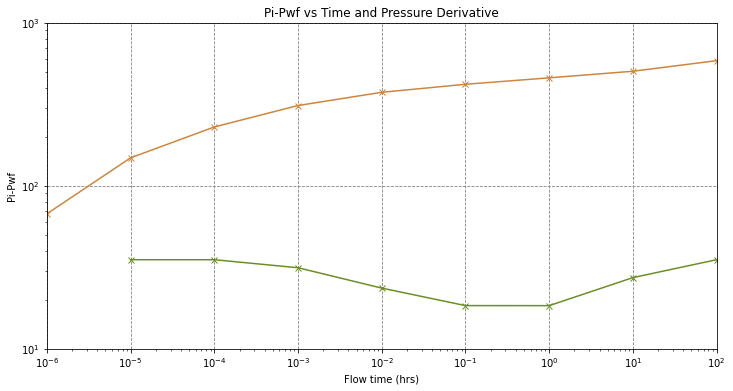

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['t (hrs)'], df['Pi-Pwf'], marker = 'x', color = 'peru')
ax.plot(df['t (hrs)'], df['Delta P'], marker = 'x', color = 'olivedrab')

ax.yaxis.grid(color ='grey', linestyle ='--')
ax.xaxis.grid(color ='grey', linestyle ='--')
ax.set_title('Pi-Pwf vs Time and Pressure Derivative')
ax.set_xlabel('Flow time (hrs)')
ax.set_ylabel('Pi-Pwf')

ax.set_ylim([10,1000])
ax.set_xlim([1.00E-6,1.00E2])
ax.set_yscale('log')
ax.set_xscale('log')

# Capacity (kf hf = k2 h) of the fractures.

In [16]:
#np.log10(df['t(hrs)'][0])

In [17]:
m = np.abs((df['Pwf (psi)'][0]- df['Pwf (psi)'][2])/ (np.log10(df['t (hrs)'][0]) - np.log10(df['t (hrs)'][2])))
print('m = {}'.format(m))

m = 81.2349999999999


In [18]:
tf = (162.6*q*bo)/m
print ('tf= {}'.format(tf))

tf= 181.14482673724402


# Storativity ratio (omega)

In [19]:
dp = 131 #Vertical seperation between the parallel straight lines

In [20]:
omega = 10**(-dp/m)
print ('omega = {}'.format(omega))

omega = 0.02440026797152315


# Fracture spacing (or characteric size of matrix blocks, hm)

In [21]:
nm = km/(phi_m* oil_visc * cm)
print ('nm = {}md-psi/cp'.format(nm))

nm = 19999.999999999996md-psi/cp


In [22]:
tao = 10 #hrs from plot

In [23]:
hm = ((nm*tao)/2370)**0.5
print ('hm = {} ft'.format(hm))

hm = 9.186304243492506 ft


# Storage of the matrix per block (sm)

In [24]:
sm = (phi_m * cm) * hm
print ('sm = {} ft/psi'.format(sm))

sm = 4.593152121746254e-06 ft/psi


# Storage of the fractures per block (Sf)

In [25]:
sf = (omega * sm)/(1-omega)
print ('sf = {} ft/psi'.format(sf))

sf = 1.1487717649486539e-07 ft/psi


# Fracture porosity (PHI2)

In [26]:
nf = tf/sf
phi2 = tf/(nf*cf*hm)
print ('phi2 = {}'.format(phi2))

phi2 = 0.001250526582289535


# Skin. Running 2 calculations. One using data from the first straight line and one using data from the last stright line.

In [27]:
nc = tf / (sf+sm)
pc1hr = 3576 # from plot
s = 1.151 * (((pi-pc1hr)/m) - np.log10(nc/rw**2) + 3.23)
print ('s = {}'.format(s))

s = 0.01415831431560882


In [28]:
pf1hr = 3445 # from plot - from plot
s = 1.151 * (((pi-pf1hr)/m) - np.log10(nf/rw**2) + 3.23)
print ('s = {}'.format(s))

s = 0.014158314315607797


# Radius of investigation as a function of time (r inv). Running calculations for all times given in the table above. Crossplot (r inv) in a Cartesian scale vs. time in a log scale

In [29]:
df['f(t,tao)'] = np.sqrt(df['t (hrs)']/tao) * np.tanh(np.sqrt(tao/df['t (hrs)']))
df.round(6)

,t (hrs),Pwf (psi),Pi-Pwf,Log(t),Delta P,"f(t,tao)"
0,0.000001,3932.50,67.50,-13.815511,NaN,0.000316
1,0.000010,3851.27,148.73,-11.512925,35.279912,0.001000
2,0.000100,3770.03,229.97,-9.210340,35.279912,0.003162
3,0.001000,3688.80,311.20,-6.907755,31.492864,0.010000
4,0.010000,3625.00,375.00,-4.605170,23.625620,0.031623
5,0.100000,3580.00,420.00,-2.302585,18.457515,0.100000
6,1.000000,3540.00,460.00,0.000000,18.442315,0.315097
7,10.000000,3495.07,504.93,2.302585,27.395296,0.761594
8,100.000000,3413.84,586.16,4.605170,35.279912,0.967948
9,1000.000000,3332.60,667.40,6.907755,NaN,0.996680


In [30]:
df['ng'] = tf/(sf+sm*df['f(t,tao)'])
df

,t (hrs),Pwf (psi),Pi-Pwf,Log(t),Delta P,"f(t,tao)",ng
0,0.000001,3932.50,67.50,-13.815511,NaN,0.000316,1.557168e+09
1,0.000010,3851.27,148.73,-11.512925,35.279912,0.001000,1.516233e+09
2,0.000100,3770.03,229.97,-9.210340,35.279912,0.003162,1.399861e+09
3,0.001000,3688.80,311.20,-6.907755,31.492864,0.010000,1.126462e+09
4,0.010000,3625.00,375.00,-4.605170,23.625620,0.031623,6.963750e+08
5,0.100000,3580.00,420.00,-2.302585,18.457515,0.100000,3.154776e+08
6,1.000000,3540.00,460.00,0.000000,18.442315,0.315097,1.159576e+08
7,10.000000,3495.07,504.93,2.302585,27.395296,0.761594,5.013703e+07
8,100.000000,3413.84,586.16,4.605170,35.279912,0.967948,3.971769e+07
9,1000.000000,3332.60,667.40,6.907755,NaN,0.996680,3.860075e+07


In [31]:
df['rinv'] = np.sqrt(0.00105*df['ng']*df['t (hrs)'])
df

,t (hrs),Pwf (psi),Pi-Pwf,Log(t),Delta P,"f(t,tao)",ng,rinv
0,0.000001,3932.50,67.50,-13.815511,NaN,0.000316,1.557168e+09,1.278682
1,0.000010,3851.27,148.73,-11.512925,35.279912,0.001000,1.516233e+09,3.990043
2,0.000100,3770.03,229.97,-9.210340,35.279912,0.003162,1.399861e+09,12.123754
3,0.001000,3688.80,311.20,-6.907755,31.492864,0.010000,1.126462e+09,34.391637
4,0.010000,3625.00,375.00,-4.605170,23.625620,0.031623,6.963750e+08,85.509868
5,0.100000,3580.00,420.00,-2.302585,18.457515,0.100000,3.154776e+08,182.003149
6,1.000000,3540.00,460.00,0.000000,18.442315,0.315097,1.159576e+08,348.934848
7,10.000000,3495.07,504.93,2.302585,27.395296,0.761594,5.013703e+07,725.561012
8,100.000000,3413.84,586.16,4.605170,35.279912,0.967948,3.971769e+07,2042.145199
9,1000.000000,3332.60,667.40,6.907755,NaN,0.996680,3.860075e+07,6366.379596


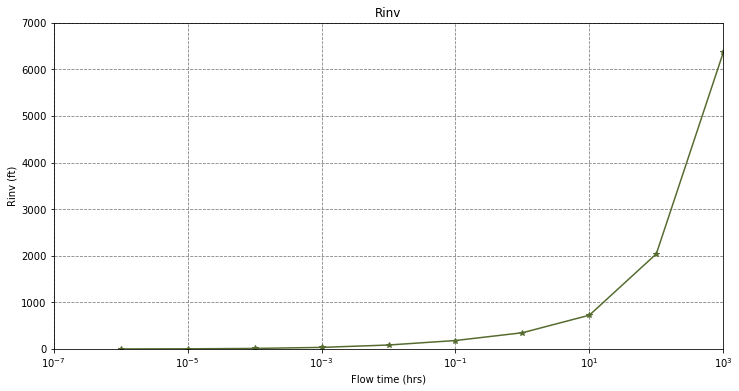

In [33]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df['t (hrs)'], df['rinv'], marker = '*', color = 'darkolivegreen')

ax.yaxis.grid(color ='grey', linestyle ='--')
ax.xaxis.grid(color ='grey', linestyle ='--')
ax.set_title('Rinv')
ax.set_xlabel('Flow time (hrs)')
ax.set_ylabel('Rinv (ft)')

ax.set_ylim([0,7000])
ax.set_xlim([1.00e-7,1.00e3])
ax.set_yscale('linear')
ax.set_xscale('log')

# 11) Generating a theoretical drawdown curve assuming unrestricted interporosity flow to match the time (t) vs. flow pressures (Pwf) shown in the table above. If necessary, adjust data that you have calculated to improve your match

In [34]:
df2 = df.drop(['Pwf (psi)', 'Pi-Pwf', 'Log(t)','Delta P', 'rinv'], axis=1)
df2

,t (hrs),"f(t,tao)",ng
0,0.000001,0.000316,1.557168e+09
1,0.000010,0.001000,1.516233e+09
2,0.000100,0.003162,1.399861e+09
3,0.001000,0.010000,1.126462e+09
4,0.010000,0.031623,6.963750e+08
5,0.100000,0.100000,3.154776e+08
6,1.000000,0.315097,1.159576e+08
7,10.000000,0.761594,5.013703e+07
8,100.000000,0.967948,3.971769e+07
9,1000.000000,0.996680,3.860075e+07


In [35]:
df2['Delta P'] = ((162.6 * q * bo)/tf) * (np.log10((df['ng']*df['t (hrs)'])/(rw**2))- 3.23 + 0.87 * s)
df2

,t (hrs),"f(t,tao)",ng,Delta P
0,0.000001,0.000316,1.557168e+09,67.148094
1,0.000010,0.001000,1.516233e+09,147.443237
2,0.000100,0.003162,1.399861e+09,225.860932
3,0.001000,0.010000,1.126462e+09,299.429903
4,0.010000,0.031623,6.963750e+08,363.697086
5,0.100000,0.100000,3.154776e+08,416.997428
6,1.000000,0.315097,1.159576e+08,462.922082
7,10.000000,0.761594,5.013703e+07,514.576103
8,100.000000,0.967948,3.971769e+07,587.592181
9,1000.000000,0.996680,3.860075e+07,667.820828


In [36]:
df2['Pwf'] = pi - df2['Delta P']
df2

,t (hrs),"f(t,tao)",ng,Delta P,Pwf
0,0.000001,0.000316,1.557168e+09,67.148094,3932.851906
1,0.000010,0.001000,1.516233e+09,147.443237,3852.556763
2,0.000100,0.003162,1.399861e+09,225.860932,3774.139068
3,0.001000,0.010000,1.126462e+09,299.429903,3700.570097
4,0.010000,0.031623,6.963750e+08,363.697086,3636.302914
5,0.100000,0.100000,3.154776e+08,416.997428,3583.002572
6,1.000000,0.315097,1.159576e+08,462.922082,3537.077918
7,10.000000,0.761594,5.013703e+07,514.576103,3485.423897
8,100.000000,0.967948,3.971769e+07,587.592181,3412.407819
9,1000.000000,0.996680,3.860075e+07,667.820828,3332.179172


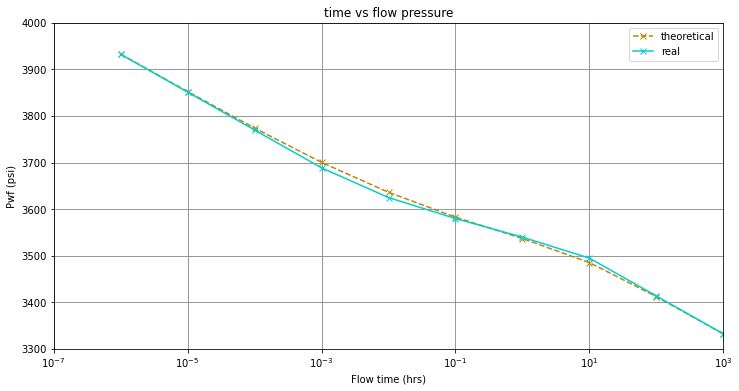

In [42]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(df2['t (hrs)'], df2['Pwf'], marker = 'x', color = 'darkgoldenrod', label='theoretical', linestyle = '--')
ax.plot(df['t (hrs)'], df['Pwf (psi)'], marker = 'x', color = 'darkturquoise', label='real')

ax.yaxis.grid(color ='grey', linestyle ='-')
ax.xaxis.grid(color ='grey', linestyle ='-')
ax.set_title('time vs flow pressure')
ax.set_xlabel('Flow time (hrs)')
ax.set_ylabel('Pwf (psi)')

ax.set_ylim([3300, 4000])
ax.set_xlim([1E-7,1E3])
ax.set_yscale('linear')
ax.set_xscale('log')
ax.legend()

# 12) Calculating the coefficient of determination (R2) for the previous question

In [62]:
from sklearn.metrics import r2_score

r2 = r2_score(df['Pwf (psi)'], df2['Pwf'])
print ('r2 = {}'.format(r2))

r2 = 0.9987836559080862
